## Dragon Real Estate Price - Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     500 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,7.001964,67.849840,3.787100,12.835968,405.128063,22.836285,352.223123,12.726186,22.564600
std,8.601545,23.322453,6.860353,0.253994,0.115878,6.908211,28.889877,2.102728,30.867311,173.182585,40.228292,98.487381,7.140479,9.239332
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,17.900000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888250,42.450000,2.100175,4.000000,277.000000,17.400000,374.462500,6.950000,17.075000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.214000,76.950000,3.190950,5.000000,330.000000,19.100000,391.305000,11.490000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.634000,93.975000,5.117675,24.000000,666.000000,20.200000,396.192500,17.107500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,95.300000,100.000000,12.126500,307.000000,711.000000,396.900000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# For plotting purpose
#import matplotlib.pyplot as plt
#housing.hist(bins=50 ,figsize=(20,15))

## Train-Test Splitting

In [9]:
#For learning purpose
import numpy as n
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing,0.2)

In [11]:
# print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(train_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(train_set)}\n")

Rows in train set:404
Rows in test set:404



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
95/7

13.571428571428571

In [17]:
376/28

13.428571428571429

In [18]:
housing = strat_test_set.copy()

## Looking for Correlations

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.766808
ZN         0.446818
DIS        0.305412
B          0.174595
CHAS       0.040765
CRIM      -0.395157
RAD       -0.426742
AGE       -0.429047
NOX       -0.463247
TAX       -0.541577
INDUS     -0.544032
PTRATIO   -0.578773
LSTAT     -0.734712
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

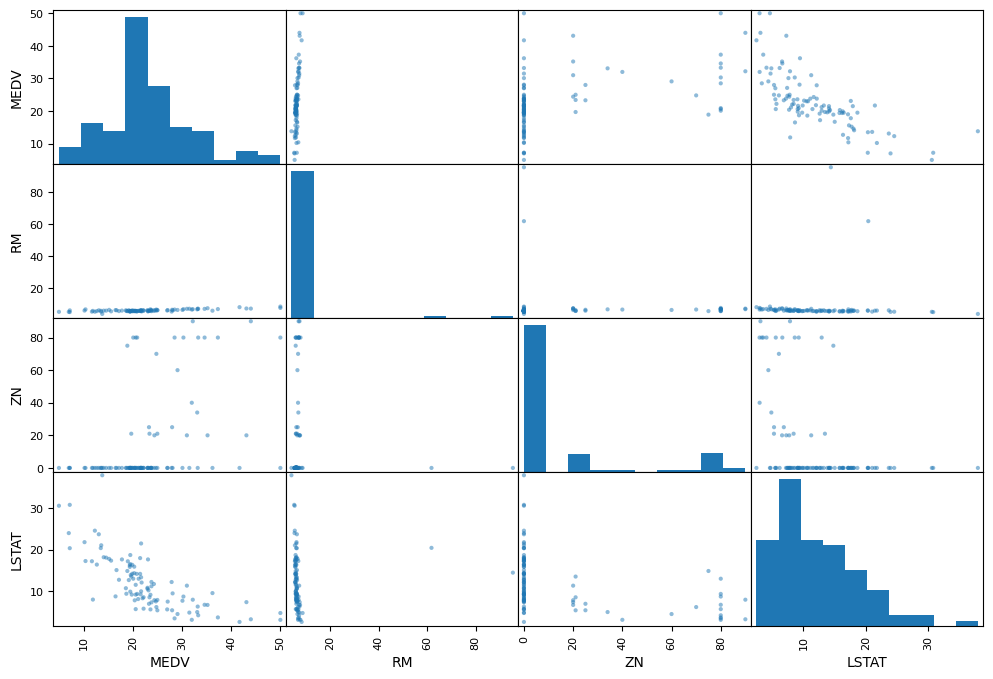

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

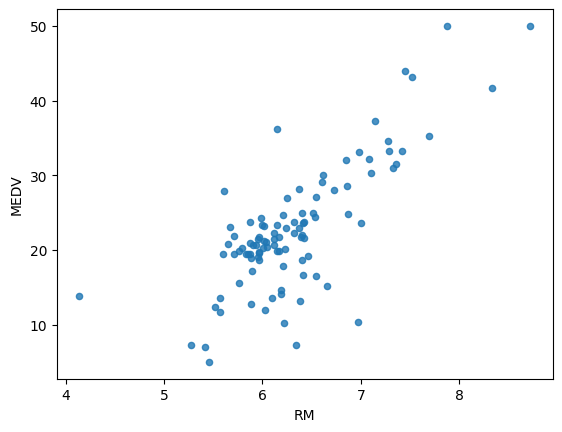

In [21]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Attribute combinations

In [22]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
342,0.02498,0.0,1.89,0,0.518,6.540,59.70,6.2669,1,422.0,15.9,389.96,8.65,16.5,64.525994
379,17.86670,0.0,18.10,0,0.671,6.223,100.00,1.3861,24,666.0,20.2,393.74,21.78,10.2,107.022336
223,0.61470,0.0,6.20,0,0.507,6.618,80.80,3.2721,8,307.0,17.4,396.90,7.60,30.1,46.388637
219,0.11425,0.0,13.89,1,0.550,6.373,92.40,3.3633,5,276.0,16.4,393.74,10.50,23.0,43.307704
48,0.25387,0.0,6.91,0,0.448,95.300,5.87,3.0000,233,17.9,396.9,30.81,14.40,NaN,0.187828


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.766808
ZN         0.446818
DIS        0.305412
B          0.174595
CHAS       0.040765
CRIM      -0.395157
RAD       -0.426742
AGE       -0.429047
NOX       -0.463247
TAX       -0.541577
INDUS     -0.544032
PTRATIO   -0.578773
TAXRM     -0.610205
LSTAT     -0.734712
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

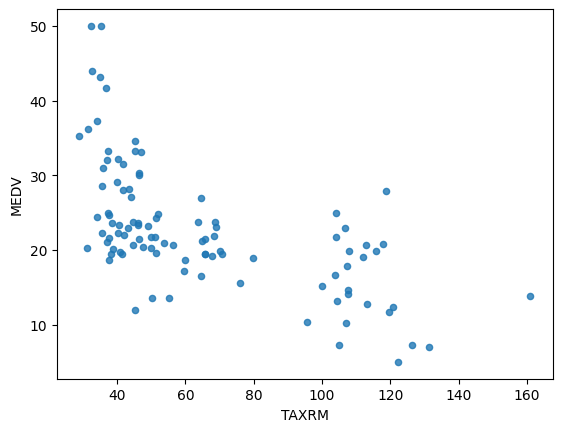

In [25]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [26]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [27]:
#To take care of missing attributes,you have three options:
 #   1.Get rid of the missing data points
 #  2.Get rid of the whole attribute
 # 3.Set the value to some value(0,mean or median)

In [28]:
a = housing.dropna(subset=["RM"]) #option1
a.shape
#Note that the original housing dataframe will remain unchanged

(404, 13)

In [29]:
housing.drop("RM",axis=1).shape #option2
# NOte that there is no RM column and also note that the original housing dataframe will remain undchanged

(404, 12)

In [30]:
median = housing["RM"].median()

In [31]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [32]:
housing.shape

(404, 13)

In [33]:
housing.describe()#befor we started filling missing attribute

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.817574,68.494410,3.745117,12.532178,409.687871,22.091485,349.686312,12.893762
std,8.099383,22.150636,6.877817,0.254290,0.116875,5.722426,28.885483,2.097942,28.923900,172.679097,36.423401,101.832366,7.281678
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,19.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,42.550000,2.035975,4.000000,283.250000,17.400000,372.685000,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.222500,77.950000,3.122200,5.000000,337.000000,19.050000,390.945000,11.705000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.636750,94.100000,5.035675,24.000000,666.000000,20.200000,395.630000,17.210000
max,73.534100,100.000000,27.740000,1.000000,0.871000,90.300000,100.000000,12.126500,307.000000,711.000000,395.580000,396.900000,36.980000


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [35]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.22250e+00, 7.79500e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90500e+01, 3.90945e+02, 1.17050e+01])

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr =pd.DataFrame(X, columns=housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.817574,68.494410,3.745117,12.532178,409.687871,22.091485,349.686312,12.893762
std,8.099383,22.150636,6.877817,0.254290,0.116875,5.722426,28.885483,2.097942,28.923900,172.679097,36.423401,101.832366,7.281678
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,19.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,42.550000,2.035975,4.000000,283.250000,17.400000,372.685000,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.222500,77.950000,3.122200,5.000000,337.000000,19.050000,390.945000,11.705000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.636750,94.100000,5.035675,24.000000,666.000000,20.200000,395.630000,17.210000
max,73.534100,100.000000,27.740000,1.000000,0.871000,90.300000,100.000000,12.126500,307.000000,711.000000,395.580000,396.900000,36.980000


## Scikit-Learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg.  imputer.It 
has a fit method and transform method. Fit method - Fits the dataset and
calculated internal parameters
    
2. Transformers - transform method taked input and retruns output based on the 
learnings from fit(). It also has a convenience funtion called fit_transfrom() which fits and then transfroms.
which fits and then transforms.

3. predictors - LineaRegression model is an example of predictor. fit() and 
predict() are two common functions.It also gives score function which will
evalute the predictions.

## Feature Scaling

Primarily, two types of feature scaling metho:

1.Min-max scaling(Normalization)
(value - min)/(max - min)
sklearn provides a class called MinMaxScaler for this

2.Standrdization
(value - mean)/std 
Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),#.....add as many as you want
    ('std_scaler',StandardScaler()),
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Convert NumPy arrays to DataFrame and Series
X_df = pd.DataFrame(housing_num_tr)
y_series = pd.Series(housing_labels)

# Combine into a single DataFrame
data = X_df.copy()
data['target'] = y_series

# Drop rows with missing target values
data = data.dropna(subset=['target'])

# Separate features and target
X_clean = data.drop('target', axis=1)
y_clean = data['target']

# Train the model
model = LinearRegression()
model.fit(X_clean, y_clean)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
some_data=housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)

array([24.25009803, 24.56275703, 22.81474807, 26.23075401, 25.85443216])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predict using the model on cleaned input
housing_predictions = model.predict(X_clean)

# Evaluate error against cleaned labels
mse = mean_squared_error(y_clean, housing_predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 9.176661772718356


In [49]:
lin_rmse = rmse
print("Linear Regression RMSE:", lin_rmse)

Linear Regression RMSE: 9.176661772718356


## Using better evaluation technique - Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use cleaned data (no NaNs)
scores = cross_val_score(model, X_clean, y_clean, scoring="neg_mean_squared_error", cv=10)

# Convert negative MSE to RMSE
rmse_scores = np.sqrt(-scores)

# Print results
print("Cross-Validated RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())


Cross-Validated RMSE Scores: [ 7.49440446  5.66622929  6.12524506  9.8454699  13.44591681 10.68104076
 11.94443155  8.33933447  4.7782901  16.14419754]
Mean RMSE: 9.446455994478738
Standard Deviation of RMSE: 3.477459909196277


In [51]:
rmse_scores

array([ 7.49440446,  5.66622929,  6.12524506,  9.8454699 , 13.44591681,
       10.68104076, 11.94443155,  8.33933447,  4.7782901 , 16.14419754])

In [52]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:  ", scores.mean())
    print("Standard deviation:", scores.std())

In [53]:
print_scores(rmse_scores)

Scores: [ 7.49440446  5.66622929  6.12524506  9.8454699  13.44591681 10.68104076
 11.94443155  8.33933447  4.7782901  16.14419754]
Mean:   9.446455994478738
Standard deviation: 3.477459909196277


## Saving the model

In [54]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on Test model

In [55]:
# Drop the target column (MEDV) from the test set
X_test = strat_test_set.drop("MEDV", axis=1)

# Copy the target column
Y_test = strat_test_set["MEDV"].copy()

# Prepare the test features using your pipeline
X_test_prepared = my_pipeline.transform(X_test)


In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error

final_prediction = model.predict(X_test_prepared)
Y_test = Y_test.reset_index(drop=True)

# Convert to numpy arrays
final_prediction = np.array(final_prediction)
Y_test_array = np.array(Y_test)

# Remove NaNs if any
mask = ~np.isnan(final_prediction) & ~np.isnan(Y_test_array)
filtered_predictions = final_prediction[mask]
filtered_Y_test = Y_test_array[mask]

# Evaluation
final_mse = mean_squared_error(filtered_Y_test, filtered_predictions)
final_rmse = np.sqrt(final_mse)

print("✅ Final RMSE:", final_rmse)
print("🔮 Predictions:", filtered_predictions)
print("📊 Actual:", list(filtered_Y_test))


✅ Final RMSE: 7.853860553196923
🔮 Predictions: [29.21352042 21.67751565 26.76515835 24.61126582 22.45764009 23.89221049
 23.25363185 24.43508724 25.70866463 23.87443219 18.15164213 25.93535345
 24.24125692 25.81059206 21.92260701 23.27581875 24.79719271 26.11794065
 24.65337154 23.23819003 25.1728174  17.53316236 26.42703704 27.43739556
 23.81363248 23.68038051 25.18287466 19.92589089 24.81851229 23.07954595
 23.39820852 27.41026137 20.77562325 23.30213891 23.16745686 27.34643155
 24.61183749 26.54588257 23.79475968 24.06283174 26.56527576 25.46229926
 24.29800233 25.75009486 24.76566848 27.7190327  26.16876733 23.32447462
 25.31905882 25.62747347 24.44133713 21.70432287 24.33421131 23.37758469
 27.20982871 27.43759301 24.90135622 24.49585231 25.22040009 22.35358775
 26.48083666 26.6696965  22.6847342  27.83323287 22.91324929 22.99640919
 23.96464177 23.75259567 25.04879228 27.64548903 25.66806576 27.70826663
 25.26744891 21.15859568 23.82908946 23.40167039 25.95349878 25.95465095
 26.

In [57]:
final_rmse

np.float64(7.853860553196923)

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.1241526 , -1.26498352,  2.61302355, -0.39920194, -0.54902579,
       -0.15645278,  0.42478889, -0.86952535])

## Using the model

In [59]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2405479 , -1.31238772,  2.61111401, -26.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([89.33969295])